# v0.17.x

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_rows=12
pd.options.display.width=80
%matplotlib inline

/Users/jreback/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## release the GIL

### http://continuum.io/blog/pandas-releasing-the-gil

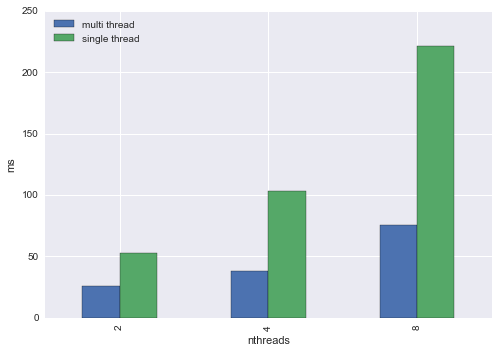

In [2]:
from IPython.display import Image
Image(filename='data/pandas-release-the-gil-timings.png') 

In [3]:
import dask.dataframe as dd

In [4]:
np.random.seed(1234)
N = int(1e7)
df = DataFrame({'key' : np.random.randint(0,1000,size=N), 
                'value' : np.random.randn(N)})
ddf = dd.from_pandas(df, npartitions=8)
ddf

dd.DataFrame<from_pandas-2f04979a0f6427260a99ff32bf14b2f0, divisions=(0, 1250000, 2500000, ..., 8750000, 9999999)>

In [5]:
%timeit df.groupby('key').value.sum()

1 loops, best of 3: 279 ms per loop


In [8]:
%timeit ddf.groupby('key').value.sum().compute()

10 loops, best of 3: 123 ms per loop


# .plot accessor

In [9]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('20150101',periods=1000,freq='h'), columns=list('ABCD'))
df = df.cumsum()

In [13]:
# df.plot(kind='line')
# df.plot.line

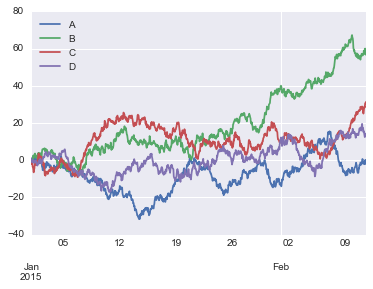

In [11]:
df.plot.line()

# datetime64[ns, tz]

In [14]:
s = Series(pd.date_range('20130101',periods=5,tz='US/Eastern'))
s

0   2013-01-01 00:00:00-05:00
1   2013-01-02 00:00:00-05:00
2   2013-01-03 00:00:00-05:00
3   2013-01-04 00:00:00-05:00
4   2013-01-05 00:00:00-05:00
dtype: datetime64[ns, US/Eastern]

In [15]:
type(s.dtype)

pandas.core.dtypes.DatetimeTZDtype

In [16]:
s.dt.tz_convert('CET')

0   2013-01-01 06:00:00+01:00
1   2013-01-02 06:00:00+01:00
2   2013-01-03 06:00:00+01:00
3   2013-01-04 06:00:00+01:00
4   2013-01-05 06:00:00+01:00
dtype: datetime64[ns, CET]

# .sort_values()

In [20]:
s = Series([1,5,3,2,4])
s

0    1
1    5
2    3
3    2
4    4
dtype: int64

In [22]:
s.sort_index(ascending=False)

4    4
3    2
2    3
1    5
0    1
dtype: int64

In [23]:
s.sort_values(ascending=False)

1    5
4    4
2    3
3    2
0    1
dtype: int64